In [91]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import numpy as np

In [92]:
rf = pd.read_excel ("DATASET.xlsx")
rf.to_csv ("DATASET.csv", 
                  index = None,
                  header=True)


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [93]:
df = pd.DataFrame(pd.read_csv("DATASET.csv"))
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [94]:
df2=df.iloc[:,1:]
df2
df2.isnull().sum()

year       0
Para-1     0
Para-2     0
Para-3     0
Para-4     0
Para-5     0
Para-6     0
Para-7     0
Para-8     0
Para-9     0
Para-10    0
Para-11    0
Para-12    0
Para-13    2
dtype: int64

In [95]:
df.fillna(df.median().round(1), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [96]:
rows=df.shape[0]
rows

1009

In [97]:
col=df.shape[1]
col

15

**Linear Regression**

In [98]:
  dfi=df.iloc[0:10,1:]
  #print(dfi)
  x=dfi.iloc[0:9,1:9]
  #print(x) 
  y1=dfi.iloc[0:9,9]
  print(y1)
  y2=dfi.iloc[0:9,10]
  print(y2)
  y3=dfi.iloc[0:9,11]
  print(y3)
  y4=dfi.iloc[0:9,12]
  print(y4)
  y5=dfi.iloc[0:9,13]
  print(y5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.9
7    0.9
8    3.4
Name: Para-9, dtype: float64
0     0.0
1     3.4
2    21.3
3    21.3
4    23.9
5    24.9
6    25.2
7    52.8
8    60.5
Name: Para-10, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8    57.0
Name: Para-11, dtype: float64
0    0
1    0
2    4
3    5
4    7
5    7
6    7
7    8
8    8
Name: Para-12, dtype: int64
0    1.52
1    1.62
2    1.68
3    1.78
4    1.80
5    1.81
6    1.86
7    1.89
8    1.92
Name: Para-13, dtype: float64


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([0.8087857 , 0.03197612, 0.50829675])

In [100]:
x_test9=dfi.iloc[9,1:9]
print(x_test9)
sum=float(0);
sum

Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


0.0

In [101]:

y_pred9=lr.predict([x_test9])
y_pred9
actual1=dfi.iloc[9,9]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual1], y_pred9)) 
sum

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


15.598654366589763

In [102]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train2,y_train2)
y_pred2=lr.predict(x_test2)
y_pred2


array([77.41721901,  5.16273836, 41.95667321])

In [103]:
y_pred9=lr.predict([x_test9])
y_pred9
actual2=dfi.iloc[9,10]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [104]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train3,y_train3)
y_pred3=lr.predict(x_test3)
y_pred3

array([0., 0., 0.])

In [105]:
y_pred9=lr.predict([x_test9])
y_pred9
actual3=dfi.iloc[9,11]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [106]:
from sklearn.model_selection import train_test_split
x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train4,y_train4)
y_pred4=lr.predict(x_test4)
y_pred4

array([13.52317182,  0.41419464,  6.58447232])

In [107]:
y_pred9=lr.predict([x_test9])
y_pred9
actual4=dfi.iloc[9,12]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [108]:
from sklearn.model_selection import train_test_split
x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train5,y_train5)
y_pred5=lr.predict(x_test5)
y_pred5



array([2.14862195, 1.62361302, 1.88589479])

In [109]:
y_pred9=lr.predict([x_test9])
y_pred9
actual5=dfi.iloc[9,13]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual5], y_pred9)) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [110]:
#Average mean of first section using lr
print(sum/5)

22.037096490071082


**Random forest Regressor**

In [111]:
  dfi=df.iloc[0:10,1:]
  #print(dfi)
  x=dfi.iloc[0:9,1:9]
  #print(x) 
  y1=dfi.iloc[0:9,9]
  print(y1)
  y2=dfi.iloc[0:9,10]
  print(y2)
  y3=dfi.iloc[0:9,11]
  print(y3)
  y4=dfi.iloc[0:9,12]
  print(y4)
  y5=dfi.iloc[0:9,13]
  print(y5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.9
7    0.9
8    3.4
Name: Para-9, dtype: float64
0     0.0
1     3.4
2    21.3
3    21.3
4    23.9
5    24.9
6    25.2
7    52.8
8    60.5
Name: Para-10, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8    57.0
Name: Para-11, dtype: float64
0    0
1    0
2    4
3    5
4    7
5    7
6    7
7    8
8    8
Name: Para-12, dtype: int64
0    1.52
1    1.62
2    1.68
3    1.78
4    1.80
5    1.81
6    1.86
7    1.89
8    1.92
Name: Para-13, dtype: float64


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor(max_depth=3)
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred
x_test9=dfi.iloc[9,1:9]
print(x_test9)
sum=float(0);
y_pred9=lr.predict([x_test9])
#y_pred9
actual1=dfi.iloc[9,9]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual1], y_pred9)) 

x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
lr=lr.fit(x_train2,y_train2)
y_pred2=lr.predict(x_test2)
#y_pred2
y_pred9=lr.predict([x_test9])
#y_pred9
actual2=dfi.iloc[9,10]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
lr=lr.fit(x_train3,y_train3)
y_pred3=lr.predict(x_test3)
#y_pred3
y_pred9=lr.predict([x_test9])
#y_pred9
actual3=dfi.iloc[9,11]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
lr=lr.fit(x_train4,y_train4)
y_pred4=lr.predict(x_test4)
#y_pred4
y_pred9=lr.predict([x_test9])
#y_pred9
actual4=dfi.iloc[9,12]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
lr=lr.fit(x_train5,y_train5)
y_pred5=lr.predict(x_test5)
#y_pred5
y_pred9=lr.predict([x_test9])
#y_pred9
actual5=dfi.iloc[9,13]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual5], y_pred9)) 


Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

In [113]:
#Average mean of first section using Random forest Regressor
print(sum/5)

29.20981999999999


**Gradient Boosting**


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
from sklearn.ensemble import GradientBoostingRegressor
lr=GradientBoostingRegressor()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred
x_test9=dfi.iloc[9,1:9]
print(x_test9)
sum=float(0);
y_pred9=lr.predict([x_test9])
#y_pred9
actual1=dfi.iloc[9,9]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual1], y_pred9)) 

x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
lr=lr.fit(x_train2,y_train2)
y_pred2=lr.predict(x_test2)
#y_pred2
y_pred9=lr.predict([x_test9])
#y_pred9
actual2=dfi.iloc[9,10]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
lr=lr.fit(x_train3,y_train3)
y_pred3=lr.predict(x_test3)
#y_pred3
y_pred9=lr.predict([x_test9])
#y_pred9
actual3=dfi.iloc[9,11]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
lr=lr.fit(x_train4,y_train4)
y_pred4=lr.predict(x_test4)
#y_pred4
y_pred9=lr.predict([x_test9])
#y_pred9
actual4=dfi.iloc[9,12]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
lr=lr.fit(x_train5,y_train5)
y_pred5=lr.predict(x_test5)
#y_pred5
y_pred9=lr.predict([x_test9])
#y_pred9
actual5=dfi.iloc[9,13]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual5], y_pred9)) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [115]:
#Average mean of first section using Random forest Regressor
print(sum/5)

26.937707477568654


**Extra Tree Regressor**

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
from sklearn.ensemble import ExtraTreesRegressor
lr=ExtraTreesRegressor(n_estimators=100, random_state=0)
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred
x_test9=dfi.iloc[9,1:9]
print(x_test9)
sum=float(0);
y_pred9=lr.predict([x_test9])
#y_pred9
actual1=dfi.iloc[9,9]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual1], y_pred9)) 

x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
lr=lr.fit(x_train2,y_train2)
y_pred2=lr.predict(x_test2)
#y_pred2
y_pred9=lr.predict([x_test9])
#y_pred9
actual2=dfi.iloc[9,10]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
lr=lr.fit(x_train3,y_train3)
y_pred3=lr.predict(x_test3)
#y_pred3
y_pred9=lr.predict([x_test9])
#y_pred9
actual3=dfi.iloc[9,11]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
lr=lr.fit(x_train4,y_train4)
y_pred4=lr.predict(x_test4)
#y_pred4
y_pred9=lr.predict([x_test9])
#y_pred9
actual4=dfi.iloc[9,12]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
lr=lr.fit(x_train5,y_train5)
y_pred5=lr.predict(x_test5)
#y_pred5
y_pred9=lr.predict([x_test9])
#y_pred9
actual5=dfi.iloc[9,13]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual5], y_pred9))

Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


In [117]:
#Average mean of first section using Random forest Regressor
print(sum/5)

27.52113999999998


**Lasso Regression**

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
from sklearn.linear_model import Lasso
lr=Lasso(alpha=0.1)
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred
x_test9=dfi.iloc[9,1:9]
print(x_test9)
sum=float(0);
y_pred9=lr.predict([x_test9])
#y_pred9
actual1=dfi.iloc[9,9]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual1], y_pred9)) 

x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
lr=lr.fit(x_train2,y_train2)
y_pred2=lr.predict(x_test2)
#y_pred2
y_pred9=lr.predict([x_test9])
#y_pred9
actual2=dfi.iloc[9,10]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
lr=lr.fit(x_train3,y_train3)
y_pred3=lr.predict(x_test3)
#y_pred3
y_pred9=lr.predict([x_test9])
#y_pred9
actual3=dfi.iloc[9,11]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
lr=lr.fit(x_train4,y_train4)
y_pred4=lr.predict(x_test4)
#y_pred4
y_pred9=lr.predict([x_test9])
#y_pred9
actual4=dfi.iloc[9,12]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
lr=lr.fit(x_train5,y_train5)
y_pred5=lr.predict(x_test5)
#y_pred5
y_pred9=lr.predict([x_test9])
#y_pred9
actual5=dfi.iloc[9,13]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual5], y_pred9)) 

Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+01, tolerance: 1.786e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incr

In [119]:
#Average mean of first section using Lasso Regression
print(sum/5)

32.58970120917935


**Descision Tree Regression**

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
from sklearn.tree import DecisionTreeRegressor
lr=DecisionTreeRegressor(max_depth=2)
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred
x_test9=dfi.iloc[9,1:9]
print(x_test9)
sum=float(0);
y_pred9=lr.predict([x_test9])
#y_pred9
actual1=dfi.iloc[9,9]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual1], y_pred9)) 

x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
lr=lr.fit(x_train2,y_train2)
y_pred2=lr.predict(x_test2)
#y_pred2
y_pred9=lr.predict([x_test9])
#y_pred9
actual2=dfi.iloc[9,10]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
lr=lr.fit(x_train3,y_train3)
y_pred3=lr.predict(x_test3)
#y_pred3
y_pred9=lr.predict([x_test9])
#y_pred9
actual3=dfi.iloc[9,11]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
lr=lr.fit(x_train4,y_train4)
y_pred4=lr.predict(x_test4)
#y_pred4
y_pred9=lr.predict([x_test9])
#y_pred9
actual4=dfi.iloc[9,12]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
lr=lr.fit(x_train5,y_train5)
y_pred5=lr.predict(x_test5)
#y_pred5
y_pred9=lr.predict([x_test9])
#y_pred9
actual5=dfi.iloc[9,13]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual5], y_pred9)) 

Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feat

In [121]:
#Average mean of first section using Decision Tree Regression
print(sum/5)

26.967333333333336


**Support Vector Regression**

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
from sklearn.svm import SVR
lr=SVR()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred
x_test9=dfi.iloc[9,1:9]
print(x_test9)
sum=float(0);
y_pred9=lr.predict([x_test9])
#y_pred9
actual1=dfi.iloc[9,9]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual1], y_pred9)) 

x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
lr=lr.fit(x_train2,y_train2)
y_pred2=lr.predict(x_test2)
#y_pred2
y_pred9=lr.predict([x_test9])
#y_pred9
actual2=dfi.iloc[9,10]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
lr=lr.fit(x_train3,y_train3)
y_pred3=lr.predict(x_test3)
#y_pred3
y_pred9=lr.predict([x_test9])
#y_pred9
actual3=dfi.iloc[9,11]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
lr=lr.fit(x_train4,y_train4)
y_pred4=lr.predict(x_test4)
#y_pred4
y_pred9=lr.predict([x_test9])
#y_pred9
actual4=dfi.iloc[9,12]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
lr=lr.fit(x_train5,y_train5)
y_pred5=lr.predict(x_test5)
#y_pred5
y_pred9=lr.predict([x_test9])
#y_pred9
actual5=dfi.iloc[9,13]
#print(actual)
#calculate RMSE
sum+=sqrt(mean_squared_error([actual5], y_pred9)) 

Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


In [126]:
sumtot=float(0);
list1=[];
Actuallist1=[];
list2=[];
Actuallist2=[];
list3=[];
Actuallist3=[];
list4=[];
Actuallist4=[];
list5=[];
Actuallist5=[];
for i in range(0,1000,10):
  dfi=df.iloc[i:i+10,1:]
 
  #print(dfi)
  x=dfi.iloc[0:9,1:9]
  #print(x) 
  y1=dfi.iloc[0:9,9]
  #print(y1)
  y2=dfi.iloc[0:9,10]
  #print(y2)
  y3=dfi.iloc[0:9,11]
  #print(y3)
  y4=dfi.iloc[0:9,12]
  #print(y4)
  y5=dfi.iloc[0:9,13]
  #print(y5)
  x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=1)
  from sklearn.ensemble import ExtraTreesRegressor
  lr=ExtraTreesRegressor(n_estimators=100, random_state=0)
  lr=lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  y_pred
  x_test9=dfi.iloc[9,1:9]
  print(x_test9)
  sum=float(0);
  y_pred9=lr.predict([x_test9])
  list1.append(y_pred9)
  #y_pred9
  actual1=dfi.iloc[9,9];
  Actuallist1.append(actual1)
  #print(actual)
  #calculate RMSE
  sum+=sqrt(mean_squared_error([actual1], y_pred9)) 

  x_train2,x_test2,y_train2,y_test2=train_test_split(x,y2,test_size=0.3,random_state=1)
  lr=lr.fit(x_train2,y_train2)
  y_pred2=lr.predict(x_test2)
  #y_pred2
  y_pred9=lr.predict([x_test9])
  list2.append(y_pred9)
  #y_pred9
  actual2=dfi.iloc[9,10]
  Actuallist2.append(actual2)
  #print(actual)
  #calculate RMSE
  #sum+=sqrt(mean_squared_error([actual2], y_pred9)) 

  x_train3,x_test3,y_train3,y_test3=train_test_split(x,y3,test_size=0.3,random_state=1)
  lr=lr.fit(x_train3,y_train3)
  y_pred3=lr.predict(x_test3)
  #y_pred3
  y_pred9=lr.predict([x_test9])
  list3.append(y_pred9)
  #y_pred9
  actual3=dfi.iloc[9,11]
  Actuallist3.append(actual3)
  #print(actual)
  #calculate RMSE
  sum+=sqrt(mean_squared_error([actual3], y_pred9)) 

  x_train4,x_test4,y_train4,y_test4=train_test_split(x,y4,test_size=0.3,random_state=1)
  lr=lr.fit(x_train4,y_train4)
  y_pred4=lr.predict(x_test4)
  #y_pred4
  y_pred9=lr.predict([x_test9])
  list4.append(y_pred9)
  #y_pred9
  actual4=dfi.iloc[9,12]
  Actuallist4.append(actual4)
  #print(actual)
  #calculate RMSE
  sum+=sqrt(mean_squared_error([actual4], y_pred9)) 

  x_train5,x_test5,y_train5,y_test5=train_test_split(x,y5,test_size=0.3,random_state=1)
  lr=lr.fit(x_train5,y_train5)
  y_pred5=lr.predict(x_test5)
  #y_pred5
  y_pred9=lr.predict([x_test9])
  list5.append(y_pred9)
  #y_pred9
  actual5=dfi.iloc[9,13]
  Actuallist5.append(actual5)
  #print(actual)
  #calculate RMSE
  sum+=sqrt(mean_squared_error([actual5], y_pred9)) 
  sumtot+=(sum/5);

print(sumtot/100)

Para-1     324.0
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    7567.0
Para-8    1885.0
Name: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      327.7
Para-2       62.0
Para-3       22.7
Para-4        0.0
Para-5        2.0
Para-6      102.0
Para-7    30525.0
Para-8    10234.0
Name: 19, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     487.7
Para-2      93.2
Para-3      22.5
Para-4       0.0
Para-5       4.0
Para-6     110.0
Para-7    2140.0
Para-8    1270.0
Name: 29, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     543.6
Para-2      93.2
Para-3      22.5
Para-4       0.0
Para-5       4.0
Para-6     110.0
Para-7    2140.0
Para-8    1270.0
Name: 39, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1      434.4
Para-2      149.0
Para-3       11.7
Para-4       72.0
Para-5        3.0
Para-6      110.0
Para-7    13142.0
Para-8     6225.0
Name: 49, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     320.0
Para-2     240.2
Para-3      22.1
Para-4       0.0
Para-5       3.0
Para-6     104.0
Para-7    7600.0
Para-8    3300.0
Name: 59, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     264.2
Para-2     231.7
Para-3      13.4
Para-4       4.5
Para-5       6.0
Para-6       0.0
Para-7    4300.0
Para-8    1300.0
Name: 69, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      505.6
Para-2      198.0
Para-3       22.5
Para-4        0.0
Para-5        4.0
Para-6      104.0
Para-7    12159.0
Para-8     7469.0
Name: 79, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1      520.7
Para-2      195.8
Para-3       22.9
Para-4        0.0
Para-5        3.0
Para-6      100.0
Para-7    12284.0
Para-8     7546.0
Name: 89, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     520.7
Para-2      77.1
Para-3      22.4
Para-4       0.0
Para-5       4.0
Para-6     106.0
Para-7    7700.0
Para-8    3300.0
Name: 99, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1      520.7
Para-2      160.8
Para-3       18.5
Para-4        0.0
Para-5        3.0
Para-6      113.0
Para-7    10675.0
Para-8     1413.0
Name: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     505.5
Para-2     198.7
Para-3      19.4
Para-4       0.0
Para-5       2.0
Para-6     106.0
Para-7    5850.0
Para-8     375.0
Name: 119, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     469.9
Para-2     306.2
Para-3      17.0
Para-4       7.0
Para-5       2.0
Para-6     112.0
Para-7    5883.0
Para-8    2847.0
Name: 129, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     439.6
Para-2     204.4
Para-3      13.1
Para-4       6.2
Para-5       4.0
Para-6     107.0
Para-7    4200.0
Para-8    2100.0
Name: 139, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     593.9
Para-2     225.0
Para-3      17.2
Para-4       0.0
Para-5       4.0
Para-6     114.0
Para-7    3400.0
Para-8     740.0
Name: 149, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     487.6
Para-2     244.1
Para-3      18.5
Para-4       0.0
Para-5       4.0
Para-6     109.0
Para-7    4200.0
Para-8     350.0
Name: 159, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     432.0
Para-2     502.8
Para-3      14.1
Para-4      19.0
Para-5       4.0
Para-6     111.0
Para-7    6250.0
Para-8    3100.0
Name: 169, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     492.8
Para-2     276.4
Para-3      17.4
Para-4       1.0
Para-5       2.0
Para-6     111.0
Para-7    7800.0
Para-8    2140.0
Name: 179, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1    1028.7
Para-2     101.6
Para-3      19.6
Para-4       0.0
Para-5       2.0
Para-6     101.0
Para-7    8171.0
Para-8     544.0
Name: 189, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     454.6
Para-2     108.7
Para-3      22.1
Para-4       0.0
Para-5       2.0
Para-6     112.0
Para-7    3100.0
Para-8     820.0
Name: 199, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     459.7
Para-2     190.4
Para-3      18.9
Para-4       0.0
Para-5       2.0
Para-6     114.0
Para-7    4360.0
Para-8     567.0
Name: 209, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     533.3
Para-2     130.0
Para-3      18.4
Para-4       0.0
Para-5       3.0
Para-6     103.0
Para-7    3500.0
Para-8     900.0
Name: 219, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     579.1
Para-2     130.0
Para-3      18.4
Para-4       0.0
Para-5       3.0
Para-6     103.0
Para-7    3500.0
Para-8     900.0
Name: 229, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     279.4
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     105.0
Para-7    9870.0
Para-8    2450.0
Name: 239, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     271.8
Para-2      53.6
Para-3      19.0
Para-4       0.0
Para-5       2.0
Para-6     110.0
Para-7    4080.0
Para-8     940.0
Name: 249, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      548.6
Para-2       62.0
Para-3       22.7
Para-4        0.0
Para-5        2.0
Para-6      102.0
Para-7    30535.0
Para-8    10234.0
Name: 259, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      563.9
Para-2       62.0
Para-3       22.7
Para-4        0.0
Para-5        2.0
Para-6      102.0
Para-7    30535.0
Para-8    10234.0
Name: 269, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     543.6
Para-2     198.7
Para-3      19.4
Para-4       0.0
Para-5       2.0
Para-6     106.0
Para-7    5800.0
Para-8     450.0
Name: 279, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     475.0
Para-2     101.6
Para-3      19.6
Para-4       0.0
Para-5       2.0
Para-6     101.0
Para-7    4927.0
Para-8     774.0
Name: 289, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     508.0
Para-2     198.7
Para-3      19.4
Para-4       0.0
Para-5       2.0
Para-6     106.0
Para-7    5850.0
Para-8     350.0
Name: 299, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     477.5
Para-2     297.5
Para-3      18.3
Para-4       0.0
Para-5       2.0
Para-6     113.0
Para-7    5300.0
Para-8     500.0
Name: 309, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     411.5
Para-2    1593.8
Para-3      17.1
Para-4       6.0
Para-5      15.0
Para-6     114.0
Para-7     982.0
Para-8     430.0
Name: 319, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     619.76
Para-2    1249.90
Para-3      16.60
Para-4       4.00
Para-5      15.00
Para-6     115.00
Para-7    1413.00
Para-8     619.00
Name: 329, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     729.0
Para-2      89.8
Para-3      17.2
Para-4       0.0
Para-5       4.0
Para-6     108.0
Para-7    5539.0
Para-8    3432.0
Name: 339, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     442.0
Para-2     667.3
Para-3       8.1
Para-4     161.0
Para-5       5.0
Para-6     114.0
Para-7    5970.0
Para-8    3130.0
Name: 349, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     861.0
Para-2     886.3
Para-3      15.7
Para-4       0.0
Para-5       3.0
Para-6     108.0
Para-7    6500.0
Para-8     231.0
Name: 359, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1    1351.0
Para-2     667.3
Para-3       8.1
Para-4     161.0
Para-5       5.0
Para-6     114.0
Para-7    1550.0
Para-8     543.0
Name: 369, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     405.0
Para-2    1627.7
Para-3      10.2
Para-4       2.9
Para-5      11.0
Para-6     106.0
Para-7    3760.0
Para-8     398.0
Name: 379, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     405.0
Para-2    1585.7
Para-3      10.0
Para-4      14.0
Para-5       9.0
Para-6     109.0
Para-7    4360.0
Para-8     295.0
Name: 389, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     819.0
Para-2    2001.6
Para-3      11.7
Para-4       0.0
Para-5      22.0
Para-6     101.0
Para-7    6760.0
Para-8     703.0
Name: 399, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     726.0
Para-2    2253.1
Para-3      10.7
Para-4      10.0
Para-5       6.0
Para-6     111.0
Para-7    2400.0
Para-8     456.0
Name: 409, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     1194.0
Para-2     1255.9
Para-3       13.7
Para-4        0.1
Para-5        8.0
Para-6      130.0
Para-7    12325.0
Para-8      908.0
Name: 419, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      668.0
Para-2      949.5
Para-3       13.1
Para-4        0.0
Para-5       26.0
Para-6      107.0
Para-7    10680.0
Para-8      555.0
Name: 429, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     617.0
Para-2    1830.4
Para-3      13.0
Para-4       1.3
Para-5       8.0
Para-6     114.0
Para-7    5500.0
Para-8     220.0
Name: 439, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     381.0
Para-2    1642.0
Para-3      14.2
Para-4       2.3
Para-5       7.0
Para-6     109.0
Para-7    1876.0
Para-8      84.0
Name: 449, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     323.0
Para-2     188.2
Para-3      16.8
Para-4       0.0
Para-5       3.0
Para-6     116.0
Para-7    4334.0
Para-8    1305.0
Name: 459, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      571.0
Para-2      546.8
Para-3       15.6
Para-4        0.0
Para-5        6.0
Para-6      113.0
Para-7    16530.0
Para-8     1015.0
Name: 469, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     516.0
Para-2     745.7
Para-3      14.1
Para-4       0.0
Para-5       5.0
Para-6     114.0
Para-7    1175.0
Para-8     240.0
Name: 479, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     516.0
Para-2     340.5
Para-3      15.6
Para-4       0.0
Para-5       6.0
Para-6     117.0
Para-7    1550.0
Para-8     335.0
Name: 489, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     520.0
Para-2     580.1
Para-3      16.6
Para-4       0.0
Para-5       4.0
Para-6     116.0
Para-7    3750.0
Para-8     165.0
Name: 499, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     520.0
Para-2     538.7
Para-3      16.2
Para-4       0.0
Para-5       4.0
Para-6     115.0
Para-7    5950.0
Para-8     560.0
Name: 509, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     485.0
Para-2    1245.2
Para-3      15.1
Para-4       0.0
Para-5       3.0
Para-6     110.0
Para-7    5100.0
Para-8     181.0
Name: 519, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1    612.0
Para-2    360.8
Para-3      7.6
Para-4    391.2
Para-5      9.0
Para-6    109.0
Para-7    565.0
Para-8     87.0
Name: 529, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1    612.0
Para-2    350.3
Para-3      7.3
Para-4    537.0
Para-5      6.0
Para-6    107.0
Para-7    130.0
Para-8     80.0
Name: 539, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1    612.0
Para-2    383.0
Para-3      8.8
Para-4    363.0
Para-5      4.0
Para-6    106.0
Para-7    115.0
Para-8     54.0
Name: 549, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     282.0
Para-2     444.2
Para-3      13.5
Para-4      58.7
Para-5       6.0
Para-6     110.0
Para-7    1868.0
Para-8     266.0
Name: 559, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      512.0
Para-2      641.5
Para-3       11.5
Para-4      107.0
Para-5        5.0
Para-6      104.0
Para-7    12831.0
Para-8     1528.0
Name: 569, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     635.0
Para-2     724.9
Para-3      10.2
Para-4      84.0
Para-5       7.0
Para-6     101.0
Para-7    6300.0
Para-8    1850.0
Name: 579, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      635.0
Para-2      629.2
Para-3        9.3
Para-4      231.0
Para-5        9.0
Para-6       98.0
Para-7    30330.0
Para-8     3924.0
Name: 589, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      349.0
Para-2      819.5
Para-3        7.2
Para-4      246.8
Para-5        7.0
Para-6      105.0
Para-7    10310.0
Para-8      530.0
Name: 599, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     349.0
Para-2     636.9
Para-3       6.5
Para-4     397.0
Para-5       7.0
Para-6     102.0
Para-7    9374.0
Para-8     165.0
Name: 609, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1    1022.0
Para-2     576.2
Para-3      13.3
Para-4      24.8
Para-5       7.0
Para-6     108.0
Para-7    2385.0
Para-8     250.0
Name: 619, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     811.0
Para-2     325.8
Para-3       7.8
Para-4     258.3
Para-5       8.0
Para-6     108.0
Para-7    4910.0
Para-8     860.0
Name: 629, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     811.0
Para-2     427.4
Para-3       7.5
Para-4     463.0
Para-5       8.0
Para-6     114.0
Para-7    5310.0
Para-8    1140.0
Name: 639, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     876.0
Para-2     269.0
Para-3       8.5
Para-4     175.8
Para-5       6.0
Para-6     104.0
Para-7    5450.0
Para-8     505.0
Name: 649, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1    1402.0
Para-2    1272.8
Para-3      14.0
Para-4      23.0
Para-5      28.0
Para-6     121.0
Para-7    7353.0
Para-8     662.0
Name: 659, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     796.0
Para-2    1201.2
Para-3      23.9
Para-4       0.0
Para-5      33.0
Para-6     106.0
Para-7    9700.0
Para-8     237.0
Name: 669, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1      796.0
Para-2     1312.8
Para-3       23.5
Para-4        0.0
Para-5       23.0
Para-6      109.0
Para-7    11430.0
Para-8      319.0
Name: 679, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      796.0
Para-2      947.6
Para-3       24.1
Para-4        0.0
Para-5       20.0
Para-6      105.0
Para-7    12940.0
Para-8      490.0
Name: 689, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1      418.0
Para-2     1482.8
Para-3       18.6
Para-4        0.0
Para-5       18.0
Para-6      118.0
Para-7    10350.0
Para-8      580.0
Name: 699, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     423.0
Para-2    1375.9
Para-3      16.8
Para-4       0.4
Para-5      14.0
Para-6     118.0
Para-7    5940.0
Para-8     604.0
Name: 709, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     365.0
Para-2    1587.0
Para-3      17.8
Para-4       0.1
Para-5      16.0
Para-6     120.0
Para-7    3078.0
Para-8     358.0
Name: 719, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     511.0
Para-2    1314.1
Para-3      15.7
Para-4       3.8
Para-5      13.0
Para-6     110.0
Para-7    5238.0
Para-8     269.0
Name: 729, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     356.0
Para-2     751.9
Para-3      19.7
Para-4       2.9
Para-5      13.0
Para-6     125.0
Para-7    3850.0
Para-8     662.0
Name: 739, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     345.0
Para-2    1227.0
Para-3      19.7
Para-4       0.0
Para-5      25.0
Para-6     115.0
Para-7    3600.0
Para-8     382.0
Name: 749, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     308.0
Para-2    1336.4
Para-3      18.2
Para-4       2.4
Para-5      15.0
Para-6     116.0
Para-7    1440.0
Para-8      35.0
Name: 759, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1      432.0
Para-2     1262.6
Para-3       20.6
Para-4        0.0
Para-5       22.0
Para-6      118.0
Para-7    15446.0
Para-8     3869.0
Name: 769, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     364.0
Para-2    1251.4
Para-3      20.4
Para-4       0.0
Para-5      22.0
Para-6     111.0
Para-7    2560.0
Para-8     255.0
Name: 779, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     724.0
Para-2     256.8
Para-3      24.3
Para-4       0.0
Para-5      52.0
Para-6      89.0
Para-7    7045.0
Para-8     180.0
Name: 789, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     318.0
Para-2    1539.3
Para-3      20.9
Para-4       0.0
Para-5      44.0
Para-6      96.0
Para-7    5454.0
Para-8     608.0
Name: 799, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     534.0
Para-2     616.3
Para-3       3.4
Para-4     843.1
Para-5      19.0
Para-6     111.0
Para-7    2420.0
Para-8     650.0
Name: 809, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     406.0
Para-2     342.9
Para-3       3.9
Para-4    1401.4
Para-5      17.0
Para-6     126.0
Para-7    2320.0
Para-8     400.0
Name: 819, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     406.0
Para-2     593.1
Para-3       2.2
Para-4    1642.0
Para-5      24.0
Para-6     130.0
Para-7    2510.0
Para-8     610.0
Name: 829, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     771.0
Para-2     508.4
Para-3       4.0
Para-4     955.7
Para-5      19.0
Para-6     114.0
Para-7    3720.0
Para-8     580.0
Name: 839, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     771.0
Para-2     503.9
Para-3       2.5
Para-4    1481.0
Para-5      19.0
Para-6     112.0
Para-7    4740.0
Para-8     680.0
Name: 849, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     743.0
Para-2     559.2
Para-3       5.5
Para-4     831.0
Para-5      10.0
Para-6     114.0
Para-7    1880.0
Para-8     270.0
Name: 859, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     743.0
Para-2     674.5
Para-3       3.9
Para-4    1012.0
Para-5      20.0
Para-6     115.0
Para-7    4510.0
Para-8    1550.0
Name: 869, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     317.0
Para-2     537.2
Para-3       4.4
Para-4     860.0
Para-5      12.0
Para-6     124.0
Para-7    1180.0
Para-8     170.0
Name: 879, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     422.0
Para-2     986.4
Para-3       1.4
Para-4    1265.0
Para-5      13.0
Para-6     115.0
Para-7    7070.0
Para-8    1400.0
Name: 889, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     422.0
Para-2     773.9
Para-3       0.2
Para-4    1562.0
Para-5      20.0
Para-6     115.0
Para-7    7680.0
Para-8     630.0
Name: 899, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     473.0
Para-2     438.1
Para-3       6.3
Para-4     541.0
Para-5      16.0
Para-6     111.0
Para-7    2770.0
Para-8     550.0
Name: 909, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     589.0
Para-2     411.4
Para-3       2.4
Para-4    2089.0
Para-5      12.0
Para-6     111.0
Para-7    1272.0
Para-8     249.0
Name: 919, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     440.0
Para-2     495.4
Para-3       1.8
Para-4    2365.0
Para-5      16.0
Para-6     120.0
Para-7    1699.0
Para-8     131.0
Name: 929, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     331.0
Para-2     436.2
Para-3       2.5
Para-4    2177.0
Para-5      14.0
Para-6     117.0
Para-7    1746.0
Para-8     300.0
Name: 939, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     652.0
Para-2     411.4
Para-3       2.4
Para-4    2089.0
Para-5      12.0
Para-6     111.0
Para-7    1272.0
Para-8     249.0
Name: 949, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1     514.0
Para-2    1404.4
Para-3       7.8
Para-4     597.0
Para-5      28.0
Para-6     115.0
Para-7    3671.0
Para-8     441.0
Name: 959, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1      901.0
Para-2     1360.7
Para-3        9.9
Para-4      167.0
Para-5       40.0
Para-6      103.0
Para-7    12530.0
Para-8      880.0
Name: 969, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


Para-1    1181.0
Para-2    1283.2
Para-3       7.1
Para-4     713.0
Para-5      28.0
Para-6     109.0
Para-7    9140.0
Para-8     730.0
Name: 979, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     662.0
Para-2    1564.4
Para-3      11.0
Para-4     212.0
Para-5      35.0
Para-6     111.0
Para-7    3861.0
Para-8    1249.0
Name: 989, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names


Para-1     454.0
Para-2    1446.2
Para-3      13.6
Para-4      69.3
Para-5      23.0
Para-6     119.0
Para-7    2156.0
Para-8     509.0
Name: 999, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


14.522526237999989


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [127]:
#RMSE of entires dataset
print(sumtot/100)

14.522526237999989


In [82]:
import matplotlib.pyplot as plt


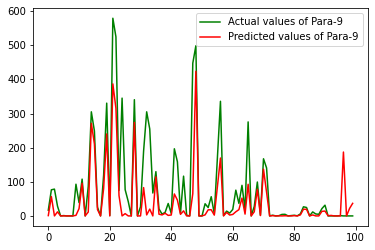

In [83]:
plt.plot(Actuallist1,'g',label='Actual values of Para-9')
plt.plot(list1,'r',label='Predicted values of Para-9')
plt.legend()

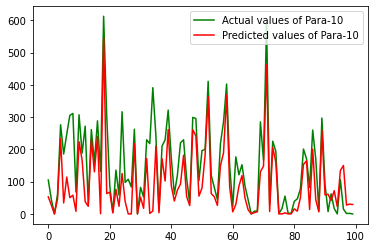

In [84]:
plt.plot(Actuallist2,'g',label='Actual values of Para-10')
plt.plot(list2,'r',label='Predicted values of Para-10')
plt.legend()

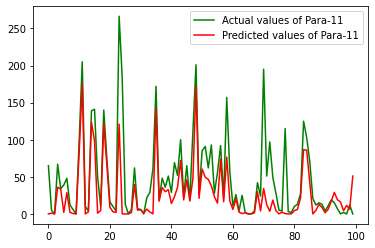

In [85]:
plt.plot(Actuallist3,'g',label='Actual values of Para-11')
plt.plot(list3,'r',label='Predicted values of Para-11')
plt.legend()

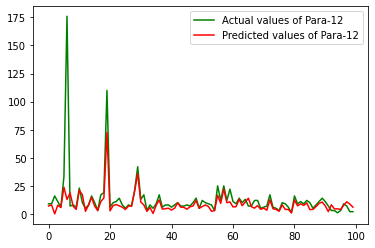

In [86]:
plt.plot(Actuallist4,'g',label='Actual values of Para-12')
plt.plot(list4,'r',label='Predicted values of Para-12')
plt.legend()

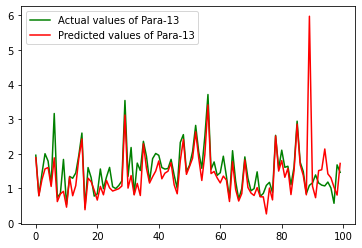

In [87]:
plt.plot(Actuallist5,'g',label='Actual values of Para-13')
plt.plot(list5,'r',label='Predicted values of Para-13')
plt.legend()